#  Using Programs with Data, SQL
> Using Programs with Data is focused on SQL and database actions.

# Database Programming is Program with Data
> Each Tri 2 Final Project should be an example of a Program with Data. 

>  Prepare to use SQLite in common Imperative Technique
- Explore [SQLite Connect object](https://www.tutorialspoint.com/python_data_access/python_sqlite_establishing_connection.htm) to establish database connection
- Explore [SQLite Cursor Object](https://www.tutorialspoint.com/python_data_access/python_sqlite_cursor_object.htm) to fetch data from a table within a database


## Schema of Users table in Sqlite.db
> Uses PRAGMA statement to read schema.

Describe Schema, here is resource [Resource](https://www.sqlite.org/index.html)
- What is a database schema?
A schema is an organization of data which serves as a sort of blueprint for how its mapped out. 
- What is the purpose of identity Column in SQL database?
The purpose of an identity column in SQL database is to provide a unique and incremental value for each row in a table. It is typically used as a surrogate key and can be used as a reference to a specific row in a table.
- What is the purpose of a primary key in SQL database?
The purpose of a primary key in SQL database is to uniquely identify each row in a table. A primary key is a column or a group of columns that uniquely identifies each row in a table. It enforces data integrity and ensures that no two rows in a table have the same primary key value.
- What are the Data Types in SQL table?
Data types include Integer,Char,Float,Boolean and many others

In [9]:
import sqlite3

database = 'instance/sqlite3.db' # this is location of database

def schema():
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Fetch results of Schema
    results = cursor.execute("PRAGMA table_info('players')").fetchall()

    # Print the results
    for row in results:
        print(row)

    # Close the database connection
    conn.close()
    
schema()


(0, 'id', 'INTEGER', 1, None, 1)
(1, '_name', 'VARCHAR(255)', 0, None, 0)
(2, '_team', 'VARCHAR(255)', 0, None, 0)
(3, '_position', 'INTEGER', 0, None, 0)
(4, '_likes', 'INTEGER', 0, None, 0)
(5, '_dislikes', 'INTEGER', 0, None, 0)
(6, '_comments', 'BLOB', 0, None, 0)


# Reading Users table in Sqlite.db
Uses SQL SELECT statement to read data

What is a connection object? After you google it, what do you think it does?
A connection object is an object used in programming to establish a connection between an application and a database. It provides methods for interacting with the database such as executing queries, committing transactions, and rolling back transactions.
Same for cursor object?
Cursor Object is is an object used to interact with the results of a database query. It allows the programmer to navigate through the result set and perform operations such as fetching individual rows or iterating over the entire set
Look at conn object and cursor object in VSCode debugger. What attributes are in the object?
The attributes they have are using ports,passwords, and database names
Is "results" an object? How do you know?
Yes results is an object because it follows similiar rules to the other objects in this schema

In [10]:
import sqlite3

def read():
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Execute a SELECT statement to retrieve data from a table
    results = cursor.execute('SELECT * FROM players').fetchall()

    # Print the results
    if len(results) == 0:
        print("Table is empty")
    else:
        for row in results:
            print(row)

    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
read()


(1, 'Ike Anigbogu', 'Indiana Pacers', 'C', 0, 20, b"\x80\x05\x957\x00\x00\x00\x00\x00\x00\x00]\x94}\x94(\x8c\x04name\x94\x8c\nDontavious\x94\x8c\x07message\x94\x8c\x0eYou're trash!!\x94ua.")
(2, 'Ron Baker', 'New York Knicks', 'G', 20, 0, b'\x80\x05\x950\x00\x00\x00\x00\x00\x00\x00]\x94}\x94(\x8c\x04name\x94\x8c\nDontavious\x94\x8c\x07message\x94\x8c\x07Mid tbh\x94ua.')
(3, 'Jabari Bird', 'Boston Celtics', 'G', 3, 0, b'\x80\x05\x95Z\x00\x00\x00\x00\x00\x00\x00]\x94}\x94(\x8c\x04name\x94\x8c\nDontavious\x94\x8c\x07message\x94\x8c13.0/3.0: Great job! You deserve some seed points.\x94ua.')
(4, 'MarShon Brooks', 'Memphis Grizzlies', 'G', 0, 0, b'\x80\x05]\x94.')


## Create a new User in table in Sqlite.db
> Uses SQL INSERT to add row
-  Compore create() in both SQL lessons.  What is better or worse in the two implementations?
This one is much less confusing and less complicated, the other one is more dynamic to use however
-  Explain purpose of SQL INSERT.   Is this the same as User __init__?
The purpose of sql insert is to edit the table, there is differences because init is for creating 

In [25]:
import sqlite3

from sqlalchemy import PickleType

def create():
    player_name = input("Enter a player name: ")
    team_name = input("Enter the player's team name: ")
    position = input("Enter the player's position: ")
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to insert data into a table
        cursor.execute("INSERT INTO players (_name, _team, _position, _likes, _dislikes) VALUES (?, ?, ?, ?, ?)", (player_name, team_name, position, 0, 0))
        
        # Commit the changes to the database
        conn.commit()
        print(f"A new user record {player_name} has been created")
                
    except sqlite3.Error as error:
        print("Error while executing the INSERT:", error)


    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
create()

A player user record  has been created


## Updating a User in table in Sqlite.db
> Uses SQL UPDATE to modify password
- What does the hacked part do?
the hacked part checks if the password reaches a minimum length, which is important in overall security for this project.
- Explain try/except, when would except occur?
The except occurs when theres an issue with sqlite3, this means the update wont work and this will be printed out instead. 
- What code seems to be repeated in each of these examples to point, why is it repeated?
The repeated code is where the cursor object is used, its needed for a connection to be established using the SQL commands. Another thing thats repeated is try/except part of the code block

In [30]:
import sqlite3

def updateLikes():
    pid = input("Enter player ID to update: ")
    likes = input("Enter new likes: ")
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to update data in a table
        cursor.execute("UPDATE players SET _likes = ? WHERE id = ?", (pid, likes))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {pid} was not found in the table")
        else:
            print(f"The row with user id {pid} has the new likes: {likes}")
            conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the UPDATE:", error)
    
    # Close the cursor and connection objects
    cursor.close()
    conn.close()

def updateDislikes():
    pid = input("Enter player ID to update: ")
    dislikes = input("Enter new dislikes: ")
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to update data in a table
        cursor.execute("UPDATE players SET _dislikes = ? WHERE id = ?", (pid, dislikes))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {pid} was not found in the table")
        else:
            print(f"The row with user id {pid} has the new dislikes: {dislikes}")
            conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the UPDATE:", error)
        
    # Close the cursor and connection objects
    cursor.close()
    conn.close()

updateLikes()
updateDislikes()


The row with user id 1 has the new likes: 1
The row with user id 1 has the new dislikes: 1


## Delete a User in table in Sqlite.db
> Uses a delete function to remove a user based on a user input of the id.
- Is DELETE a dangerous operation?  Why?
Delete is dangerous because theres no way to reverse it, however this can be countered by just creating the user again which takes more time but is worth it. 
- In the print statemements, what is the "f" and what does {uid} do?
The f is used as embed expressions inside the string of literals. the {uid} is used to input the user id thats being used in the code

In [29]:
import sqlite3

def delete():
    pid = input("Enter user id to delete")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    
    try:
        cursor.execute("DELETE FROM players WHERE id = ?", (pid))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No id {pid} was not found in the table")
        else:
            # The uid was found in the table and the row was deleted
            print(f"The row with id {pid} was successfully deleted")
        conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the DELETE:", error)
        
    # Close the cursor and connection objects
    cursor.close()
    conn.close()

delete()
    

The row with uid 5 was successfully deleted


# Menu Interface to CRUD operations
> CRUD and Schema interactions from one location by running menu. Observe input at the top of VSCode, observe output underneath code cell.
- Why does the menu repeat?
Menu repeats because its used as a recursive function
- Could you refactor this menu?  Make it work with a List?
The way you refractor this menu is by using CRUD options that are useful. It can also work when using a list. 

In [31]:
# Menu, to run other cells from one control point
def menu():
    operation = input("Enter: (C)reate (R)ead (U)pdate or (D)elete or (S)chema")
    if operation.lower() == 'c':
        create()
    elif operation.lower() == 'r':
        read()
    elif operation.lower() == 'ul':
        updateLikes()
    elif operation.lower() == 'ud':
        updateDislikes()
    elif operation.lower() == 'd':
        delete()
    elif operation.lower() == 's':
        schema()
    elif len(operation)==0: # Escape Key
        return
    else:
        print("Please enter c, r, u, or d") 
    menu() # recursion, repeat menu
        
try:
    menu() # start menu
except:
    print("Perform Jupyter 'Run All' prior to starting menu")


# Hacks

> Procedural Abstraction

Yes. There is procedural abstraction in this datas implementation. Theres clearly code here which is generalized with certain parameters so that it serves a certain purpose. An example is the update function which has variables inputted into it which are then edited in the actual sql database. This is a collegeboard requirement to do which means that it will be very useful and helpful to know for the AP exam, how to analyse procedural abstraction. 

> Data Abstraction

Yes, there is data abstraction in this code. The way you can see how data abstraction is happening is through the CRUD functions which are all used to interact with each other in various ways. The one I used in my evaluation was the create function, where the new users are being created, which gave me the output of the variable, which gives all the information about the line in the debug cell. 

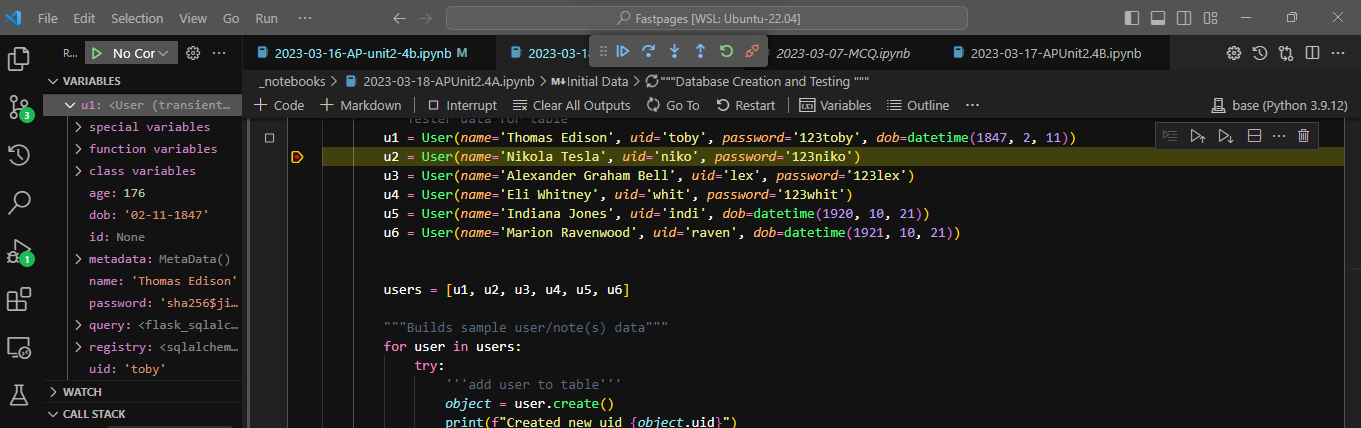

# OOP Style Table

In [4]:
import sqlite3

class MyDatabase:
    def __init__(self, db_name):
        self.conn = sqlite3.connect(db_name)
        self.cur = self.conn.cursor()
    
    def create_table(self, table_name, fields):
        self.cur.execute(f"CREATE TABLE {table_name} ({fields})")
        self.conn.commit()
    
    def insert_data(self, table_name, data):
        placeholders = ','.join('?' * len(data))
        self.cur.execute(f"INSERT INTO {table_name} VALUES ({placeholders})", data)
        self.conn.commit()
    
    def close_connection(self):
        self.conn.close()

# Define the name of the database file
db_name = 'sqlite.db'

# Create a new database object and connect to the database
my_db = MyDatabase(db_name)

# Define the table name and fields
table_name = 'my_tab'
fields = 'id INTEGER PRIMARY KEY, name TEXT, age INTEGER'

# Call the create_table method to create the new table
my_db.create_table(table_name, fields)

# Define the data to be inserted into the table
data = [(1, 'John', 30), (2, 'Jane', 25)]

# Call the insert_data method to insert the data into the table
for row in data:
    my_db.insert_data(table_name, row)

# Close the connection to the database
my_db.close_connection()
